# Phenotypic stability and plasticity in GMP-derived cells as determined by their underlying regulatory network (Supplementary Information)

This R notebook provides the script used to construct the figures shown in the supplementary material. 

## 1. The BRN model of only well grounded interactions is not sufficient for main GMP patterns determination

As indicated in the text, the process of model construction was two-step. In the first step a Boolean Regulatory Network (BRN) was constructed with interactions whose direct regulation is known. The so constructed first version of the model is provided in the regulatoryNetworkGMPModelDirectInteractions.txt file. The next block of code is used to load the BRN model and to calculate its attractors.

In [1]:
# Loading dependencies
library(BoolNet)
library(reshape)
library(ggplot2)
library(igraph)
library(dplyr)

# Loading local scripts (found at https://github.com/caramirezal/RegulatoryNetworkGMPModel)
source("cellFateMap.R")
source("getTransitionMatrix.R")
source("simplifyCellFateMap.R")
source("tagAttractorsMatrix.R")
source("plotAttractors.a.R")
source("usefulFunctions.R")
source("getMutants.R")
source("whichPeturbations.R")
source("fixedEnvironments.R")
source("rmNodes.R")

# Loading the regulatory network model of 
# well grounded direct interactions
net<-loadNetwork("regulatoryNetworkGMPModelDirectInteractions.txt")

# definition of the phenotype patterns. Note that in the full regulatory network model
# the marker ccr3 is added to distinguish between basophils and eosinophils phenotypes.
monocytes<-c("mcsfr"=1,"pu1"=1)
neutrophils<-c("lf"=1, "cebpa"=1)
eosinophils<-c("fceRIa"=1,"gata1"=1,"cebpa"=1,"mbp"=1)
basophils<-c("cebpa"=1,"gata2"=1,"runx1"=1,"mbp"=1)
mast<-c("mitf"=1,"ckit"=1,"cebpa"=0)
Lne<-c("mcsfr"=0,"lf"=0,"mbp"=0,"ckit"=0,"fceRIa"=0)
phenotypes<-list("monocytes"=monocytes,"neutrophils"=neutrophils,
                 "eosinophils"=eosinophils,"mast cells"=mast,
                 "Lne"=Lne,"basophils"=basophils)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘dplyr’

The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



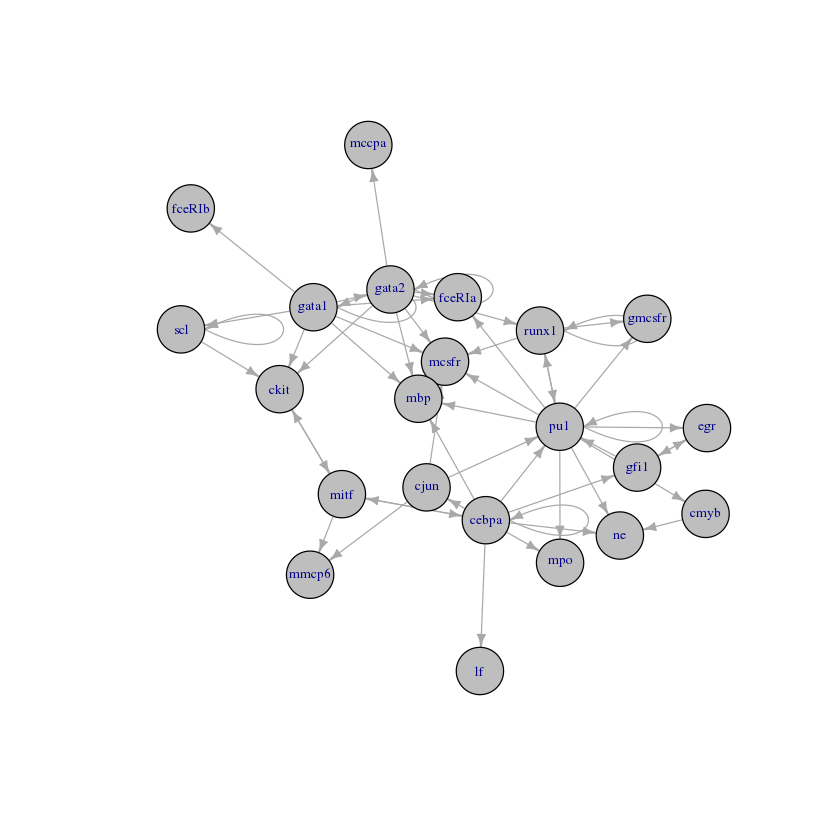

In [2]:
# Plotting the topology of the BRN model of only well grounded direct interactions
# The figure 1 was edited using igraph
plotNetworkWiring(net)

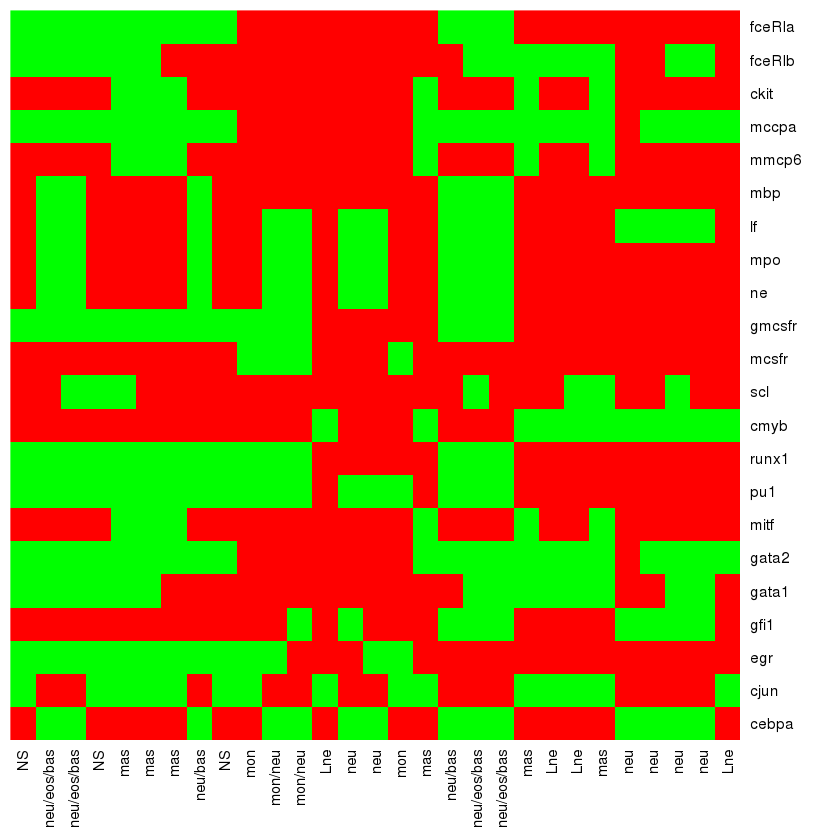

In [3]:
# calculating attractors of the BRN of well grounded direct interactions
attractors<-getAttractors(net, method = "sat.exhaustive")

# tag attractors according to the defintions given at the beginning
taggedAttractors<-tagAttractorsMatrix(net,attractors,phenotypes)

# Plotting the attractors
heatmap(taggedAttractors,Rowv = NA,Colv=NA, col=c("red","green"))

Note that attractors with none of the allready defined patterns were found (NS, for non-specified). Additionally, many attractors have more than one phenotype pattern tag. This attractors have therefore mixed attractor patterns. However, attractors with patterns similar to neutrophils (neu), monocytes (mon) and mast cells (mas) were found. Basophil pattern were missing. 

## 2. The full BRN GMP model

With the aim of finding the missing basophil pattern and also to avoid non biological meaningful mixed or NS patterns we added interactions to the model inferred from epigenetic experiments. These type of interactions could be indirect and can be regarded as model assumptions. The main benefit of doing that assumptions is that it provides a way to reduce the space of possible BRN models for the process. Additionally, it provides a theoretical framework to support the existence of that assumed restrictions. The following code load the full version BRN model and then performs the perturbation analysis.

In [4]:
# loading the full BRN model
net<-loadNetwork("regulatoryNetworkGMPModel.txt")

# definition of the phenotype patterns. In the full model
# CCR3, CEBPb, and IL3Ra signalling is added.
monocytes<-c("mcsfr"=1,"pu1"=1)
neutrophils<-c("lf"=1, "cebpa"=1)
eosinophils<-c("fceRIa"=1,"gata1"=1,"cebpa"=1,"ccr3"=1)
basophils<-c("cebpa"=1,"gata2"=1,"runx1"=1,"ccr3"=0)
mast<-c("mitf"=1,"ckit"=1,"cebpa"=0)
Lne<-c("mcsfr"=0,"lf"=0,"mbp"=0,"ckit"=0,"fceRIa"=0,"ccr3"=0)
phenotypes<-list("monocytes"=monocytes,"neutrophils"=neutrophils,
                 "eosinophils"=eosinophils,"mast cells"=mast,
                 "Lne"=Lne,"basophils"=basophils)

# calculate attractors
attractors<-getAttractors(net, method = "sat.exhaustive")

# tag attractors according to the defintions given at the beginning
taggedAttractors<-tagAttractorsMatrix(net,attractors,phenotypes)

attractors.nm<-colnames(taggedAttractors)
#"neu/GMP" has a neutrophil pattern, hence it is renamed "neu"
attractors.nm[which("neu/GMP"==attractors.nm)]<-"neu"
colnames(taggedAttractors)<-attractors.nm


## 3. Model robustness 

We performed the analysis of the robustness of the BRN model by randomly perturbating the Boolean functions and then quantifying the level of change of the model trajectories.  The network boolean functions were perturbed by flipping values randomly. Then the hamming distance between the original model and the pertubed one were measured and recorded. This process is repeated 100,000 times using randomly created RN with the same conectivity of the BRN model. The distribution of the hamming distances between original-perturbed network is implemented in the next block of code. 

$hist
$breaks
 [1] 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065 0.070 0.075

$counts
[1]  1  3 32 46 68 79 45 20  6

$density
[1]  0.6666667  2.0000000 21.3333333 30.6666667 45.3333333 52.6666667 30.0000000
[8] 13.3333333  4.0000000

$mids
[1] 0.0325 0.0375 0.0425 0.0475 0.0525 0.0575 0.0625 0.0675 0.0725

$xname
[1] "randomResults"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$pval
[1] 0

$significant
[1] TRUE


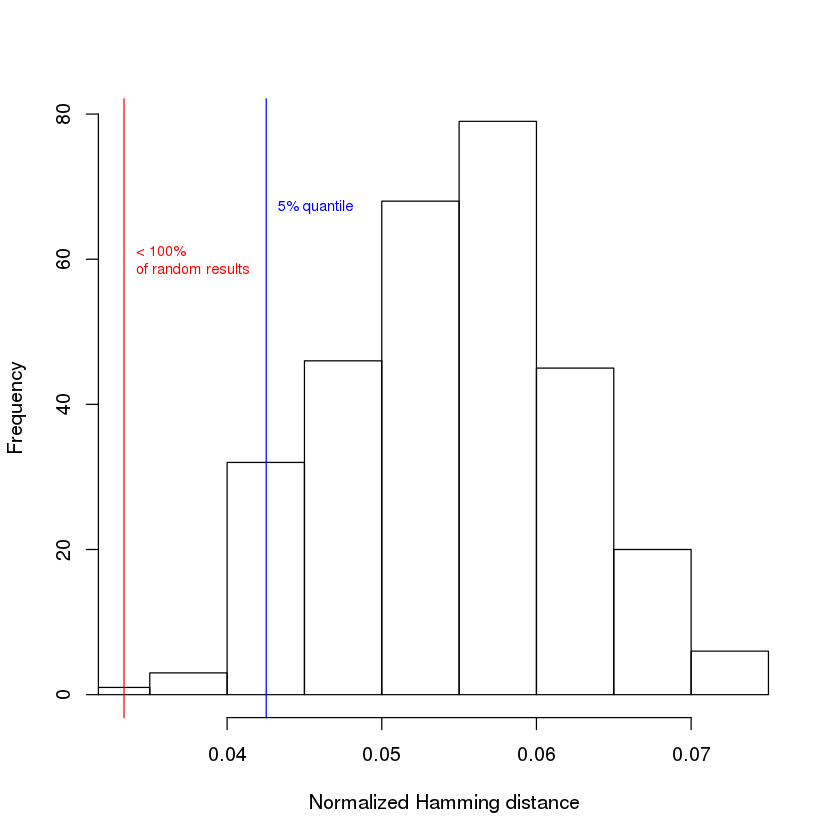

In [5]:
testNetworkProperties(net,numRandomNets = 300, testFunction = "testTransitionRobustness",
                     testFunctionParams = list(numSamples=30),alternative = "less")


From the robustness analysis it can be seen that the GRN model tends conserve both attractors and trajectories with respect to randomly created netowrk with the same topology.

## 4. Simulation of loss of function mutants

Since many BRN model could in theory reach the same attractors patterns. We proceed to validate the model by simulating gain/loss of function mutants to compare with experimental available data. We simulate the loss (gain) of function mutant by keeping the value of node constantly OFF (ON) during all the simulation. We did this sistematically as shown in the next figure. 

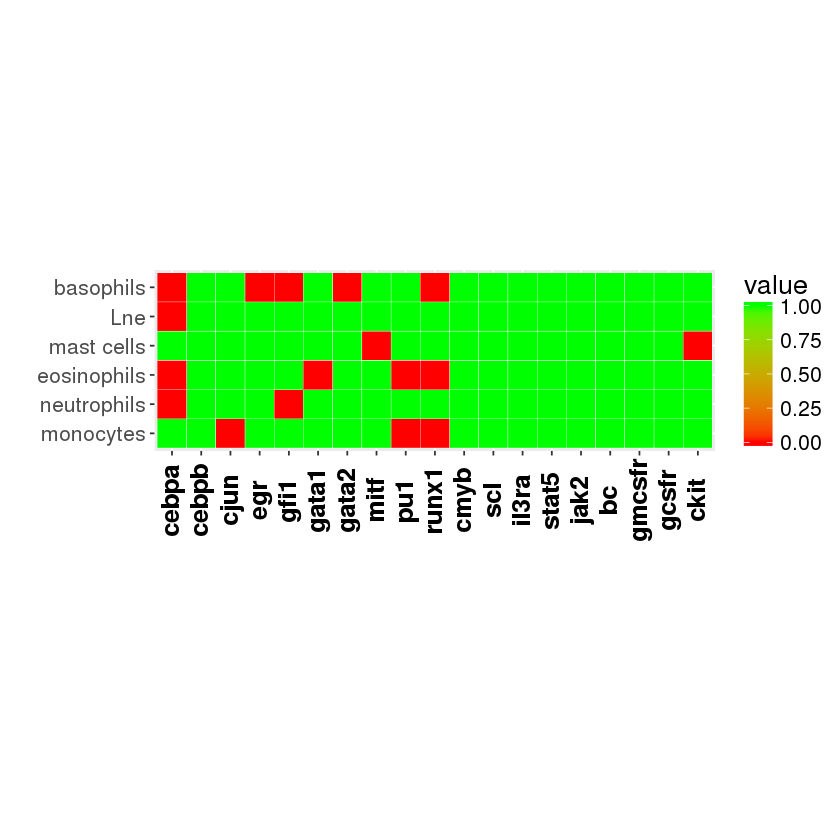

In [6]:
mutantsNull<-getMutants(net, phenotypes,fixed = 0)

# to fix the value of a non-regulator node does not change dynamics, so they are discarded.
# Only regulators are taken into account.
regulators<-findRegulators(net)

mutantsNull.r<-mutantsNull[regulators,]
mutantsNull.r<-binarizeMatrix(mutantsNull.r,1)

plotAttractors.a(mutantsNull.r)

Where gray (black) boxes represent the presence (absence) of at least one attractor of the pattern class. For example, in the C/EBPa loss of function mutant only mast cells and monocytes are found and attractors corresponding to neutrophils, eosinophils and basophils attractors classes are lost.

## 5. Transitions derived by single transient node perturbations

Our main purpose was to simulate the evolution of temporal expression patterns. However, if we only base our analysis solely on attractors the system is expected to remain in these states and no pattern evolution would be observed. Hence, attractors most be perturbed in some way in order to simulate pattern transitions. 
Our first approach was to simulate single transient node perturbations by flipping node values, that is if the node was ON then the value was changed to OFF and viceversa. This process was carried out sistematically for every node. 

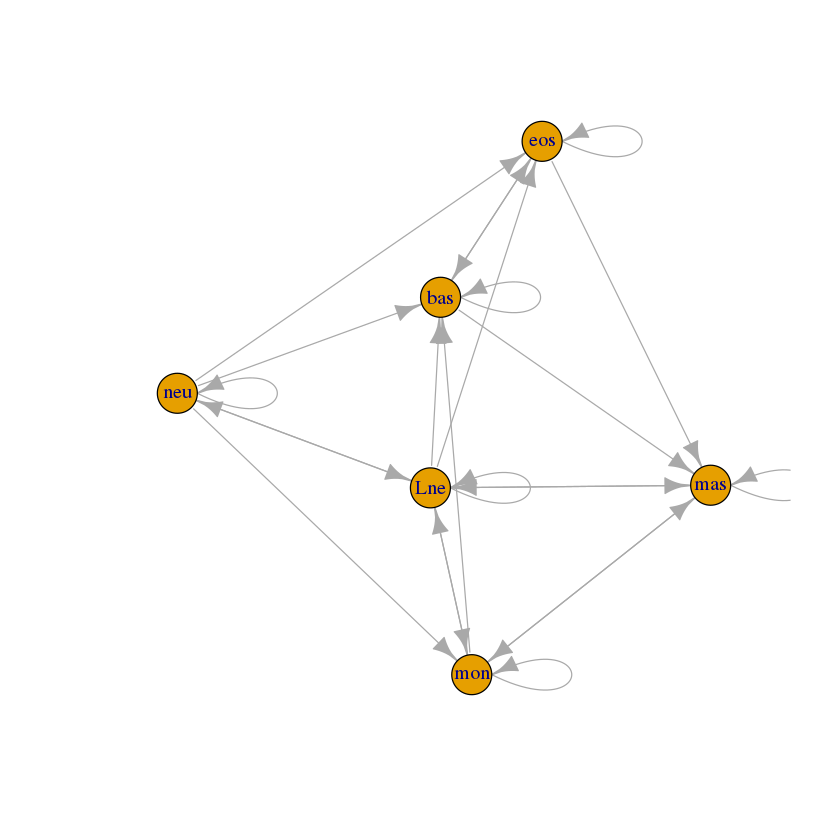

In [7]:
cfms<-cellFateMap(net=net, attractors=attractors,
                  type="asynchronous",
                  simpliflied = "yes",tag = "yes",
                  patternsList = phenotypes,
                  numberOfIterations=100)

threshold<-0

cfms.nm<-colnames(cfms)
#"neu/GMP" has a neutrophil pattern, hence it is renamed "neu"
cfms.nm[which("neu/GMP"==cfms.nm)]<-"neu"
colnames(cfms)<-cfms.nm
rownames(cfms)<-cfms.nm
# simplifying the cell fate map
cfms<-simplifyCellFateMap(cfms)

# plot simplified transition matrix in the form of a graph
cfms.g<-binarizeMatrix(cfms,threshold)
cfms.g<-graph.adjacency(cfms.g)
plot(cfms.g)

The following function is used to record the name of the perturbed node which caused a particular transition.

In [8]:
# the output result is saved in the whichPerturbations.txt file
whichPerturbations(net,attractors,
                   iterations = 100,
                   attractorsNames = make.unique(attractors.nm) )


We wanted to assed which transitions were independent of the upating regimen chosen. Therefore, we repeated the analysis using synchronous updating. 

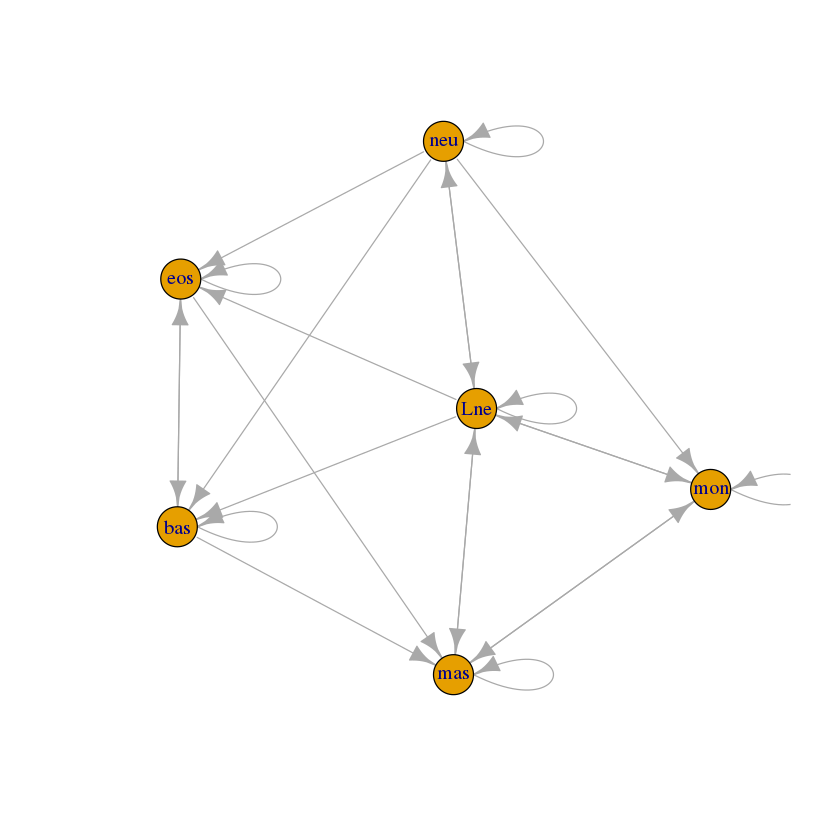

In [9]:
cfms<-cellFateMap(net=net, attractors=attractors,
                  type="synchronous",
                  simpliflied = "yes",tag = "yes",
                  patternsList = phenotypes)

threshold<-0

cfms.nm<-colnames(cfms)
#"neu/GMP" has a neutrophil pattern, hence it is renamed "neu"
cfms.nm[which("neu/GMP"==cfms.nm)]<-"neu"
colnames(cfms)<-cfms.nm
rownames(cfms)<-cfms.nm
# simplifying the cell fate map
cfms<-simplifyCellFateMap(cfms)

# plot simplified transition matrix in the form of a graph
cfms.g<-binarizeMatrix(cfms,threshold)
cfms.g<-graph.adjacency(cfms.g)
plot(cfms.g)

It can be seen that transitions patterns are conserved in general. For example, in both updating methods no transitions are observed from GMP to mast cells phenotypes.

## 6. Simulation of fixed environments

Extra and intracellular environmental clues (as for example, cytokines and transcription factors) are important for guiding the type of cellular response. Hence, we analyzed the change in steady state patterns in response to different fixed environments. Then, in the following simulations to simulated environmental conditions, different sets of node values were set constant. Since we were interested in which attractors are preserved after the environment conditions are switched we used the already calculated wild type attractors as initial states in these simulations and then calculated the new attractors.

In [10]:
fixedEnvironments <- list("Pro Neu"=c("cebpa"=1,"pu1"=0,"gcsfr"=1),
                        "Pro Mon"=c("cebpa"=0,"pu1"=1,"mcsfr"=1),
                        "Pro Mas"=c("il3ra"=1,"ckit"=1),
                        "Pro Eos"=c("cebpa"=1,"gata1"=1,"fceRIa"=1),
                        "Pro Bas"=c("cebpa"=1,"gata2"=1,"runx1"=1,"il3ra"=1),
                        "Null TFs"=c("cebpa"=0,"pu1"=0,"gata1"=0,"mitf"=0),
                        "Cytokines"=c("mcsfr"=1,"gcsfr"=1,"gmcsfr"=1,"il3ra"=1,"ckit"=1,"fceRIa"=1),
                        "Null cytokines"=c("mcsfr"=0,"gcsfr"=0,"gmcsfr"=0,"il3ra"=0,"ckit"=0,"fceRIa"=0))



simEnvironments(net,fixedEnvironments,attractors,phenotypes)

,Pro Neu,Pro Mon,Pro Mas,Pro Eos,Pro Bas,Null TFs,Cytokines,Null cytokines
Lne,1,0,0,0,0,1,0,1
neu,1,0,0,0,0,0,0,1
bas,1,0,0,0,1,0,0,1
mas,0,0,1,0,0,0,1,0
eos,0,0,0,1,1,0,0,0
mon,0,1,0,0,0,0,0,0


## 7. Removing network interactions

We addressed the effect of removing network conexion from the regulatory graph by systematically removing node strings from every Boolean expression for each node. The we asked what fraction of attractors of the wild type network could reach the already defined GMP patterns after a node interaction was removed. We performed the deletion of the total 83 of regulators for each Boolean node expression. 

In [11]:
rmInteractions <- rmInteractions(file = "regulatoryNetworkGMPModel.txt",
                     attractors = attractors,phenotypes = phenotypes )



In [12]:
head(rmInteractions)
write.table(rmInteractions,file = "rmInteractions.tb",row.names = F)

affectedNode,removedNode,percentageConservedAttractors
ckit,mitf,0.5714286
runx1,pu1,0.7142857
scl,scl,0.7619048
egr,gfi1,0.8095238
gfi1,egr,0.8095238
pu1,cebpa,0.8095238


The output of rmInteractions() is a data frame ordered (ascendent) by the fraction of attractors that reach GMP patterns after the indicated node was removed from a Boolean expression in each affected node. The complementary fraction could then be redirected to newattractors with no GMP patterns or mixed GMP patterns. This analysis can give a sigth of how important is an interaction to mantain a GMP patterns.

From the table it can be seen that deletion of MITF-1 from the c-KIT node Boolean expression had a profound effect in the attractor patterns since nearly half of the new attractors lost wild type phenotypes. A fuller table can be seen in the rmInteractions.tb file.